# **Project Name:** Industrial Equipment Anomaly Detection & Predictive Maintenance System

#### **Project Type:** Exploratory Data Analysis (EDA) and Classification
#### **Contribution:** Individual Contribution by Aadarsh Kumar  
---

## **Project Overview**
Modern industrial equipment is equipped with numerous sensors that capture essential metrics such as temperature, speed, torque, and tool wear. Analyzing this sensor data is critical for identifying potential failures before they lead to unexpected breakdowns, thereby enhancing operational efficiency. 

#### This project focuses on:
- Developing a **machine learning model** to detect failures based on real-time sensor readings.
- **Classifying** various failure types to streamline troubleshooting.
- Creating an **interactive dashboard** that visualizes failure trends and delivers timely alerts.
---


### Dataset Description

The dataset contains 10,000 records with detailed information about each sensor reading and machine condition. Key features include:

- **UID:** A unique identifier assigned to each record (1 to 10,000).
- **Product ID:** An alphanumeric code indicating product quality:
  - **L (50%)** Low quality
  - **M (30%)** Medium quality
  - **H (20%)** High quality  
  *(Followed by a variant-specific serial number.)*
- **Air Temperature [K]:** Generated using a random walk process, normally distributed with a standard deviation of 2 K around an average of 300 K.
- **Process Temperature [K]:** Computed by adding a constant offset of 10 K to the air temperature, with a standard deviation of 1 K.
- **Rotational Speed [rpm]:** Derived from a power input of 2860 W, with superimposed normally distributed noise.
- **Torque [Nm]:** Values are centered around 40 Nm with a standard deviation of 10 Nm, ensuring no negative outputs.
- **Tool Wear [min]:** Incremented based on product quality:
  - High quality: +5 minutes
  - Medium quality: +3 minutes
  - Low quality: +2 minutes
- **Machine Failure (Target Variable):** Indicates whether a failure event occurred at the time of the sensor reading, capturing different types of failures.

---

### Project Goals

- **Failure Detection:** Use machine learning to analyze sensor data and identify when a machine is likely to fail.
- **Failure Classification:** Differentiate between various failure types to help pinpoint the root cause and expedite troubleshooting.
- **Dashboard Development:** Build a user-friendly interface for real-time monitoring of failure trends and generating alerts.

---

### Tools & Technologies

- **Data Processing:** Python, Pandas, and NumPy
- **Modeling:** Scikit-learn
- **Visualization:** Matplotlib and Seaborn
- **User Interface:** Flask
- **Development Environment:** Google Colab

---

### Project Objectives

- **Predictive Analytics:** Develop a robust machine learning model that flags abnormalities in sensor data.
- **Preventive Maintenance:** Forecast maintenance requirements to preempt equipment failure, thereby minimizing downtime and reducing maintenance costs.

---


In [6]:
#Data Handlling and Visualization
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Machine Learning and Pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

#### Loading the Dataset

In [9]:
os.getcwd()

'/Users/aadarshk/CORE_PROJECTS'

In [10]:
df = pd.read_csv('/Users/aadarshk/CORE_PROJECTS/predictive_maintenance.csv')

#### Dataset Overview

In [12]:
def summarize_df(df):
    
    # Display First few rows of dataset
    print("First Few Rows of Dataset: \n")
    display(df.head())
    print("\n" + "--" * 65 + "\n")
    
    # Display shape(number of rows and columns) of dataset
    print(f"The Dataset has {df.shape[0]} rows and {df.shape[1]} columns\n")
    print("\n" + "--" * 65 + "\n")

    # Display Concise Summary of dataset
    print("Info summary of Dataset:\n")
    df.info()
    print("\n" + "--" * 65 + "\n")

    # Display Descriptive statistics for numerical coumns
    print("Descriptive statistics for numerical coumns:\n")
    display(df.describe())
    print("\n" + "--" * 65 + "\n")

    # Display Datatypes present in Dataset
    print("The datatypes in dataset: ")
    df_dtypes = pd.DataFrame(df.dtypes, columns = ['Types']).sort_values(by = 'Types').reset_index()
    display(df_dtypes)

In [13]:
summarize_df(df)

First Few Rows of Dataset: 



,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure



----------------------------------------------------------------------------------------------------------------------------------

The Dataset has 10000 rows and 10 columns


----------------------------------------------------------------------------------------------------------------------------------

Info summary of Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target      

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000



----------------------------------------------------------------------------------------------------------------------------------

The datatypes in dataset: 


,index,Types
0,UDI,int64
1,Rotational speed [rpm],int64
2,Tool wear [min],int64
3,Target,int64
4,Air temperature [K],float64
5,Process temperature [K],float64
6,Torque [Nm],float64
7,Product ID,object
8,Type,object
9,Failure Type,object


#### Cleaning Dataset

In [15]:
df_null = df.isnull().sum()

missing_values = df_null[df_null > 0]
if not missing_values.empty:
    print("Missing values are: ")
    display(missing_values)
else:
    print("\nThere are no Missing Values.\n")



There are no Missing Values.



In [16]:
sum(df.duplicated())

0

In [17]:
df_unique = pd.DataFrame(df.nunique(), columns = ['Unique_Values']).sort_values(by = 'Unique_Values').reset_index()
display(df_unique)
print("\n" + "--"*30 + "\n")

for col in df.columns:
    if df[col].nunique() < 10:
        print(f"Column name: {col}\n" + f"Unique Values Count: {df[col].nunique()}\n" + f"Values: {df[col].unique()}")
        print("\n" + "--"*30 + "\n")
        

,index,Unique_Values
0,Target,2
1,Type,3
2,Failure Type,6
3,Process temperature [K],82
4,Air temperature [K],93
5,Tool wear [min],246
6,Torque [Nm],577
7,Rotational speed [rpm],941
8,UDI,10000
9,Product ID,10000



------------------------------------------------------------

Column name: Type
Unique Values Count: 3
Values: ['M' 'L' 'H']

------------------------------------------------------------

Column name: Target
Unique Values Count: 2
Values: [0 1]

------------------------------------------------------------

Column name: Failure Type
Unique Values Count: 6
Values: ['No Failure' 'Power Failure' 'Tool Wear Failure' 'Overstrain Failure'
 'Random Failures' 'Heat Dissipation Failure']

------------------------------------------------------------



In [18]:
#Creating a copy for taking further necessary steps
df1 = df.copy()


### Understanding the Variables & Dataset Overview

#### General Dataset Characteristics
- **Size & Structure:**  
  The dataset consists of 10,000 rows and 10 columns.
- **Data Integrity:**  
  There are no missing or null values, and duplicate records have been eliminated.

#### Unique Identifiers and Categories
- **Unique IDs:**  
  Both the UID and Product ID columns contain 10,000 unique entries, ensuring every record is distinct.
- **Product Type:**  
  The 'Type' column categorizes products into three quality levels: 'M', 'L', and 'H'.
- **Failure Indicator:**  
  The Target variable, indicating failure status, is binary with values: 0 (no failure) and 1 (failure).
- **Failure Classification:**  
  The 'Failure Type' field includes six categories:  
  - No Failure  
  - Power Failure  
  - Tool Wear Failure  
  - Overstrain Failure  
  - Random Failures  
  - Heat Dissipation Failure

#### Statistical Insights
- **Air Temperature [K]:**  
  Values range from 295.3 K to 304.5 K, averaging around 300 K.
- **Process Temperature [K]:**  
  Ranges between 305.7 K and 313.8 K, with a mean of 310 K.
- **Rotational Speed [rpm]:**  
  The speed varies from 1168 rpm to 2886 rpm, with an average of 1538 rpm.
- **Torque [Nm]:**  
  Measured values span from 3.8 Nm to 76.6 Nm, with a mean close to 39.98 Nm.
- **Tool Wear [min]:**  
  Recorded from 0 up to 253 minutes, averaging approximately 107.95 minutes.

#### Key Observations
- **Clean Dataset:**  
  The absence of missing or duplicate entries confirms a robust and well-maintained dataset.
- **Feature Types:**  
  Most variables are numerical, except for the categorical 'Type' and 'Failure Type' columns.
- **Failure Rarity:**  
  With the Target variable averaging 0.0339, failures occur in about 3.4% of the cases, emphasizing the importance of precise anomaly detection.
- **Classification Necessity:**  
  The diversity in failure types underlines the need for a tailored classification approach to accurately diagnose different issues.



In [20]:
# Dropping 'UDI' and 'Product ID'columns 
df1.drop(columns = ['UDI', 'Product ID'], inplace = True)

In [21]:
# Numerical to Float
df1['Tool wear [min]'] = df1['Tool wear [min]'].astype('float')
df1['Rotational speed [rpm]'] = df1['Rotational speed [rpm]'].astype('float')

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  float64
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  float64
 6   Target                   10000 non-null  int64  
 7   Failure Type             10000 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 625.1+ KB


In [23]:
# Rename
df1.rename(mapper = {'Air temperature [K]': 'Air temperature', 
                    'Process temperature [K]': 'Process temperature',
                    'Rotational speed [rpm]': 'Rotational speed',
                    'Torque [Nm]': 'Torque',
                    'Tool wear [min]': 'Tool wear'}, axis = 1, inplace = True)

In [24]:
features = [col for col in df1.columns
           if df1[col].dtypes == 'float64' or col == 'Types']
target = ['Target', 'Failure Type']

In [25]:
# Data where Random Failure = 1
df1_RNF = df1.loc[df1['Failure Type'] == 'Random Failures'].index
drop1 = df1.loc[df1_RNF, target]
drop1

,Target,Failure Type
1221,0,Random Failures
1302,0,Random Failures
1748,0,Random Failures
2072,0,Random Failures
2559,0,Random Failures
3065,0,Random Failures
3452,0,Random Failures
5471,0,Random Failures
5489,0,Random Failures
5495,0,Random Failures


##### Since, these observations has a random nature therefore not predictable so we decide to remove these rows.


In [27]:
# Removing Random Failures observations
print(f"Number of observations which have Random Failures are: {drop1.shape[0]}")

df1.drop(index = df1_RNF, inplace = True)

Number of observations which have Random Failures are: 18


##### Fortunately the machine failure RNF occurs in only 18 observations

In [29]:
#Observations where where 'Target' is 1 but 'Failure Type' is 'No Failure'
df1_ambiguous = df1.loc[(df1['Target'] == 1) & (df1['Failure Type'] == 'No Failure')].index
display(df1.loc[df1_ambiguous, target])



,Target,Failure Type
1437,1,No Failure
2749,1,No Failure
4044,1,No Failure
4684,1,No Failure
5536,1,No Failure
5941,1,No Failure
6478,1,No Failure
8506,1,No Failure
9015,1,No Failure


In [30]:

# Setting 'Target' to 0 for these indices
df1.loc[df1_ambiguous, 'Target'] = 0
display(df1.loc[df1_ambiguous, target])

,Target,Failure Type
1437,0,No Failure
2749,0,No Failure
4044,0,No Failure
4684,0,No Failure
5536,0,No Failure
5941,0,No Failure
6478,0,No Failure
8506,0,No Failure
9015,0,No Failure


## Data Visualization & Storytelling

- **Visual Exploration:**  
  Utilized bar, scatter, box, heatmap, and line charts to uncover patterns and correlations.

- **Narrative Crafting:**  
  Built a clear story by providing context, emphasizing key insights, and enhancing visuals with effective labels and colors.

- **Data-Driven Decisions:**  
  Applied these insights to guide feature selection and model tuning for predictive maintenance.

In [32]:
# Listing Numerical features 
num_features = [col for col in df1.columns if df1[col].dtypes == 'float64']
num_features

['Air temperature',
 'Process temperature',
 'Rotational speed',
 'Torque',
 'Tool wear']

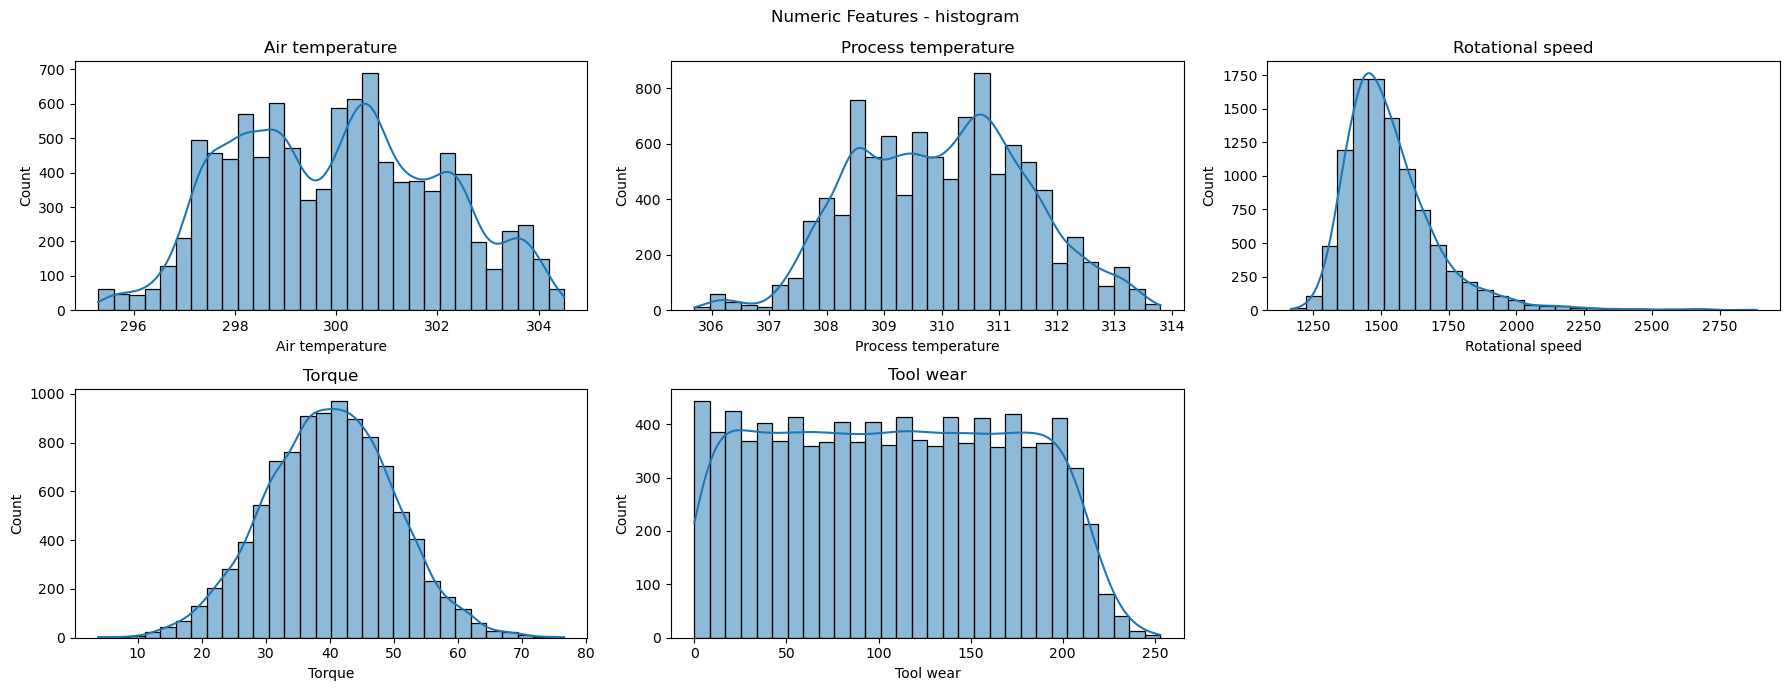

In [33]:
#Plot histograms

plt.figure(figsize = (18,7))
plt.suptitle('Numeric Features - histogram')

for i, col in enumerate(num_features, 1):
    plt.subplot(2,3,i)
    sns.histplot(df1[col], bins = 30, kde = True)
    plt.title(col)


plt.tight_layout()
plt.show()

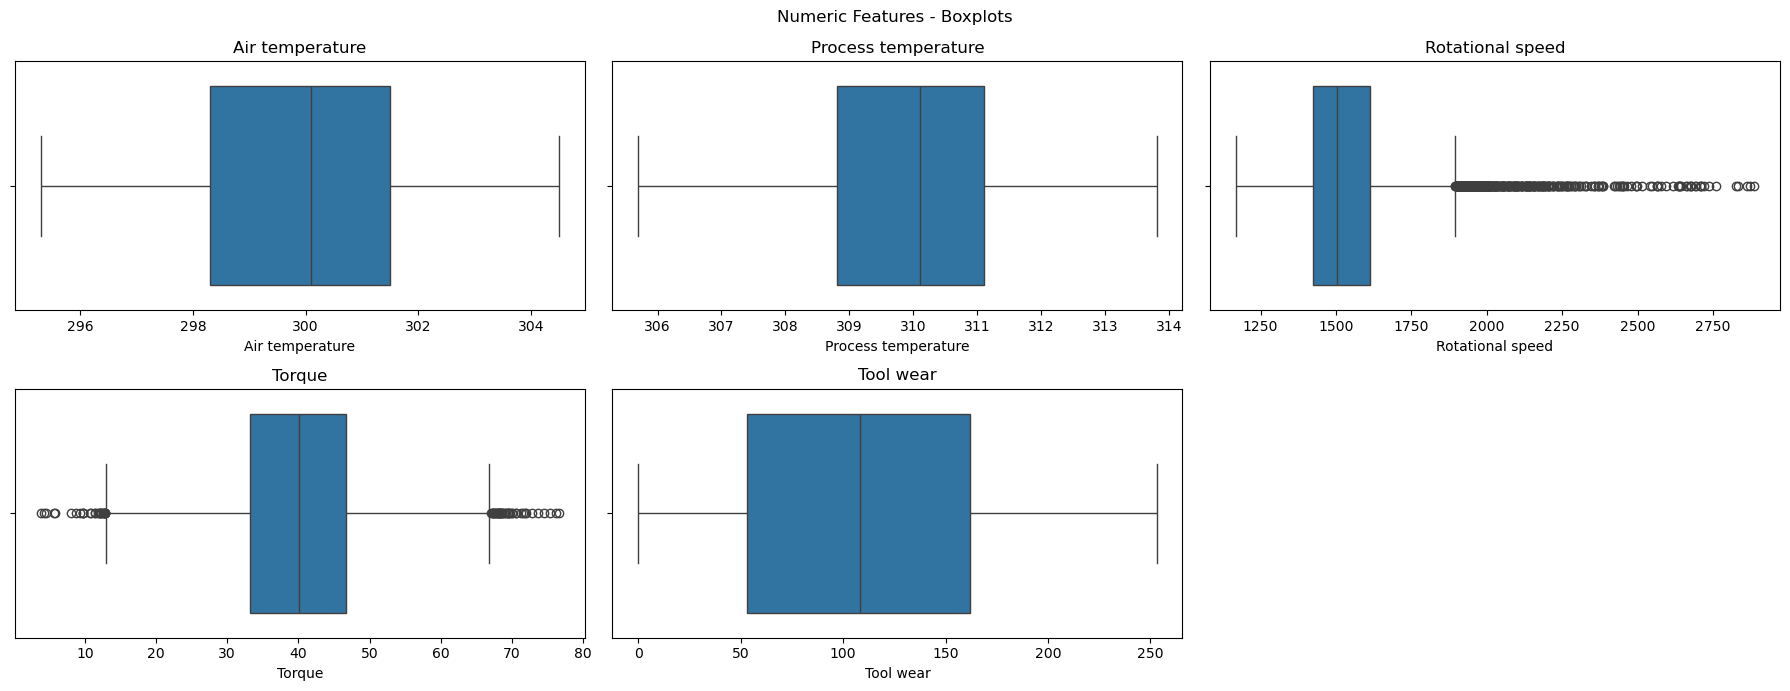

In [34]:
# Plot Boxplots

plt.figure(figsize = (18,7))
plt.suptitle('Numeric Features - Boxplots')

for i, col in enumerate(num_features, 1):
    plt.subplot(2,3,i)
    sns.boxplot(x = df1[col])
    plt.title(col)

plt.tight_layout()
plt.show()

### Outlier Analysis

- **Rotational Speed:**  
  Shows a right-skewed distribution with many high-end outliers, possibly indicating sensor issues or pre-failure behavior.

- **Torque:**  
  Exhibits outliers on both ends, suggesting stress conditions that could lead to equipment failure.

**Decision:**  
Retain these outliers to preserve critical early-warning signals for failure detection.


#### 1st Chart

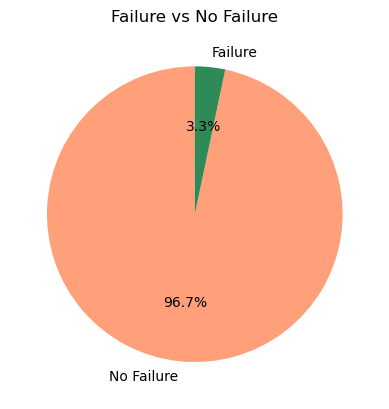

In [37]:
# Target Chart
target_count = df1['Target'].value_counts()

# Creating Pie Chart
plt.pie(target_count, labels = ['No Failure', 'Failure'], autopct='%1.1f%%',
        colors=['lightsalmon','seagreen'], startangle=90)
plt.title('Failure vs No Failure')
plt.show()

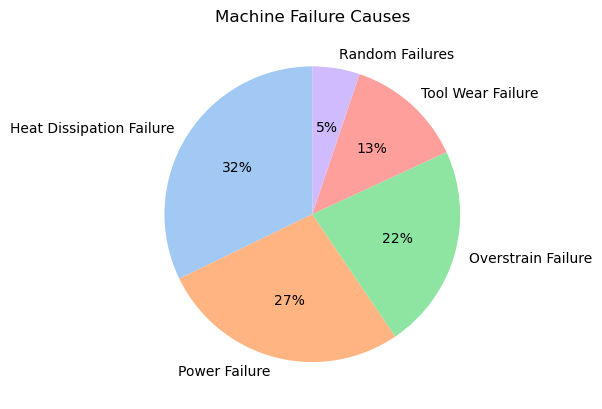

In [38]:
# Chart - 2 visualization code
# Filter data where failure occurred
df_fail = df[df['Failure Type'] != 'No Failure']

# Calculate failure type percentages
failure_percentages = df_fail['Failure Type'].value_counts(normalize=True) * 100

# Plot pie chart
plt.pie(failure_percentages, labels=failure_percentages.index, autopct='%.0f%%',
        colors=sns.color_palette('pastel'), startangle=90)
plt.title('Machine Failure Causes')
plt.show()

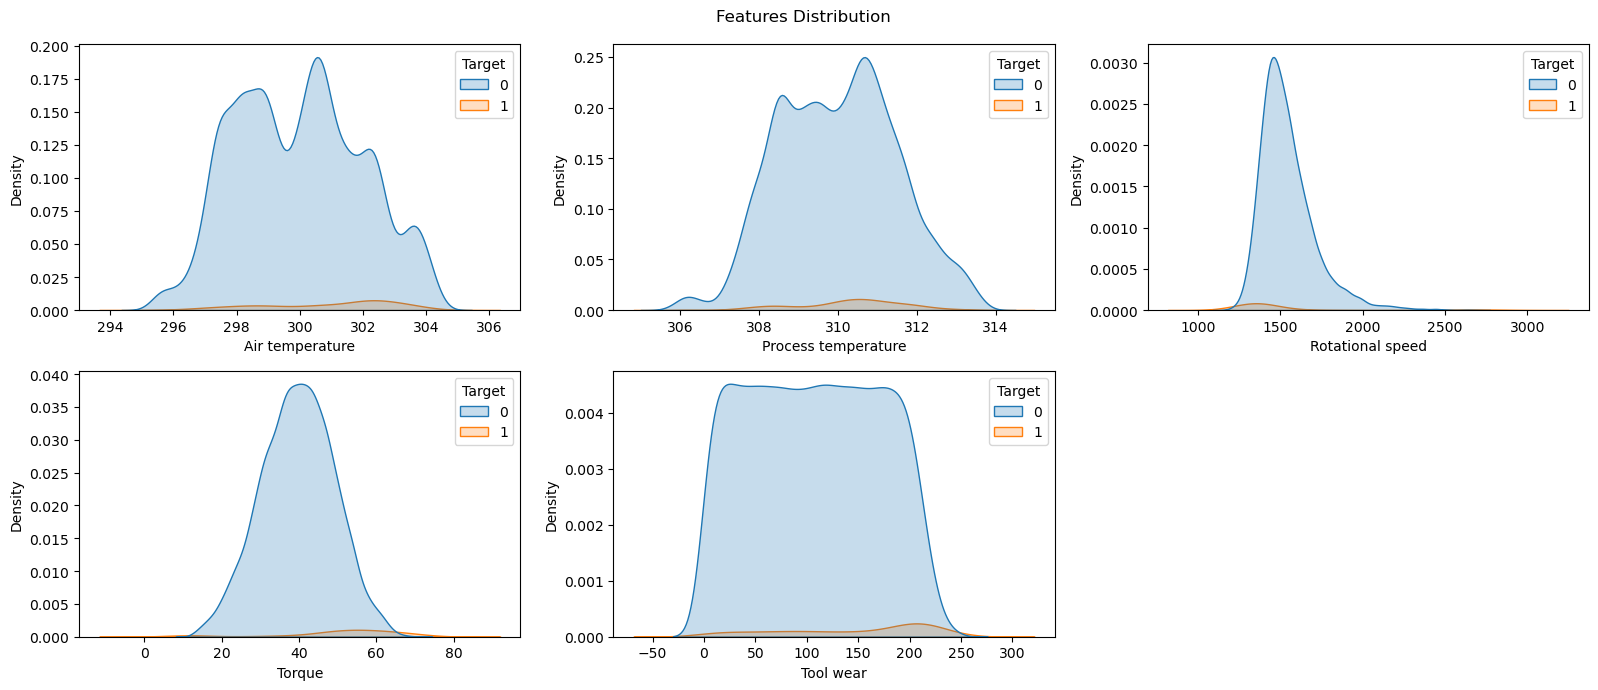

In [39]:
# KDE plot for numeric features
fig, axs = plt.subplots(2, 3, figsize=(16, 7))
fig.suptitle('Features Distribution')

# Flatten the axes array for easier indexing
axs = axs.flatten()

for i, col in enumerate(num_features):
    sns.kdeplot(data=df1, x=col, hue='Target', fill=True, ax=axs[i], palette='tab10')

# Hide unused subplots
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

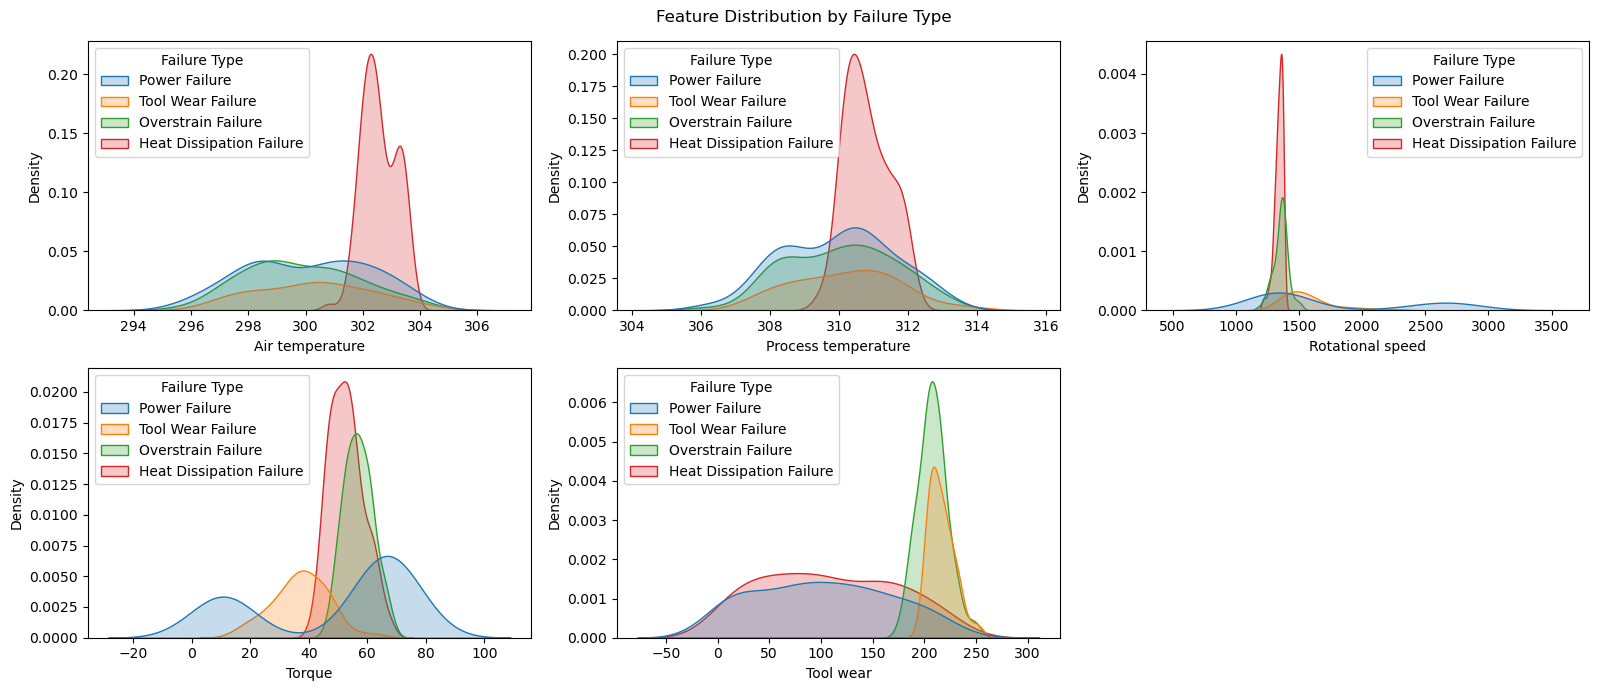

In [40]:
# Chart - 4 visualization code
# Filter data where Target is 1 (machine failed)
df_failed = df1[df1['Target'] == 1]

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(16, 7))
fig.suptitle('Feature Distribution by Failure Type')

axs = axs.flatten()  # Flatten for easy indexing

for i, col in enumerate(num_features):
    sns.kdeplot(data=df_failed, x=col, hue='Failure Type', fill=True, ax=axs[i], palette='tab10')

# Remove empty subplots if there are fewer than 6 features
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

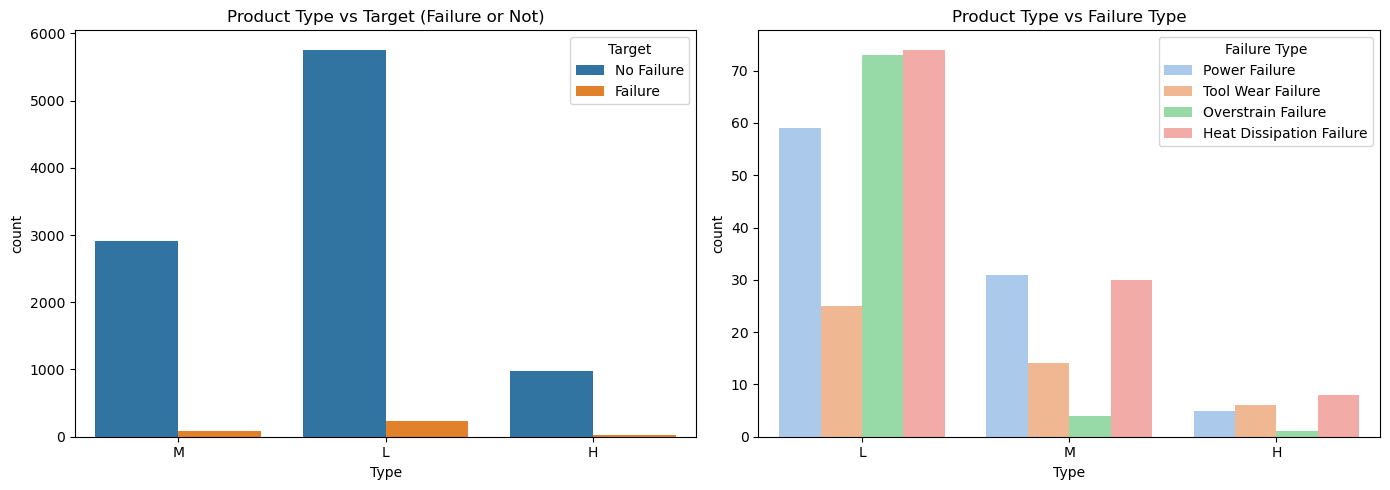

In [41]:

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Count plot for Type vs Target
sns.countplot(data=df1, x='Type', hue='Target', ax=axs[0])
axs[0].set_title('Product Type vs Target (Failure or Not)')
axs[0].legend(title='Target', labels=['No Failure', 'Failure'])

# Count plot for Type vs Failure Type (only failed cases)
df_failed = df1[df1['Target'] == 1]
sns.countplot(data=df_failed, x='Type', hue='Failure Type', ax=axs[1], palette='pastel')
axs[1].set_title('Product Type vs Failure Type')
axs[1].legend(title='Failure Type')

plt.tight_layout()
plt.show()

/var/folders/7m/27jbt3310cl5xwlb7_5g9rbm0000gn/T/ipykernel_2309/816179271.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df1, x='Type', y='Target', ax=axs[0], palette='tab10')
/var/folders/7m/27jbt3310cl5xwlb7_5g9rbm0000gn/T/ipykernel_2309/816179271.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_failed, x='Type', y=df_failed['Failure Type'].astype('category').cat.codes, ax=axs[1], palette='tab10')


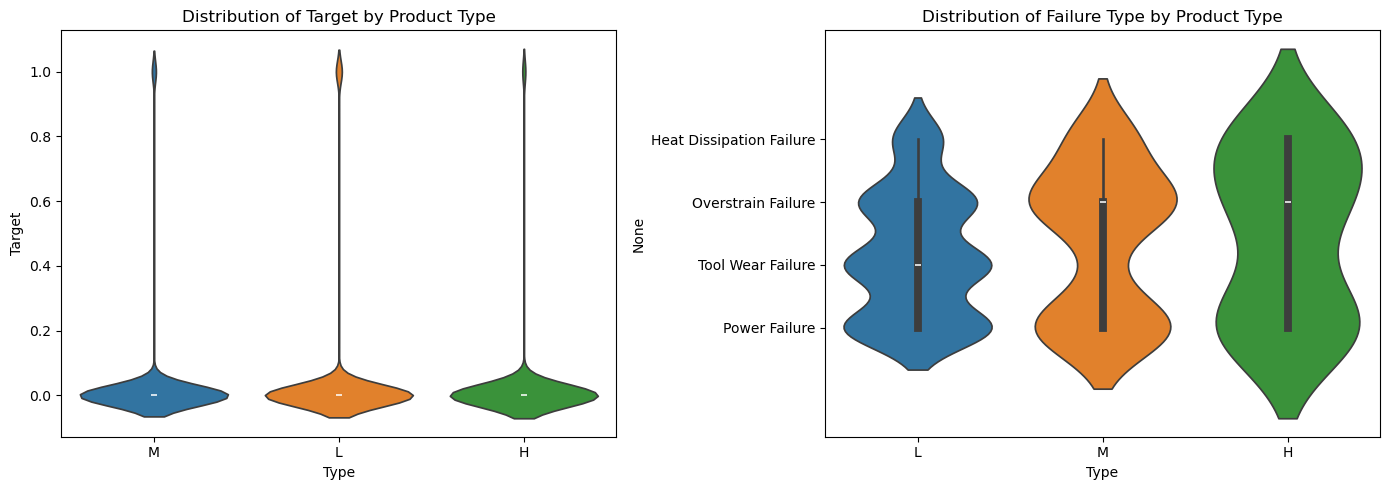

In [42]:
#Figure
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Violin plot for Type vs Target
sns.violinplot(data=df1, x='Type', y='Target', ax=axs[0], palette='tab10')
axs[0].set_title('Distribution of Target by Product Type')

# Violin plot for Type vs Failure Type (only failed cases)
df_failed = df1[df1['Failure Type'] != 'No Failure']
sns.violinplot(data=df_failed, x='Type', y=df_failed['Failure Type'].astype('category').cat.codes, ax=axs[1], palette='tab10')
axs[1].set_title('Distribution of Failure Type by Product Type')
axs[1].set_yticks(range(len(df_failed['Failure Type'].unique())))
axs[1].set_yticklabels(df_failed['Failure Type'].unique())

plt.tight_layout()
plt.show()

In [43]:
#copy the dataset for the next preprocessing
df3 = df1.copy()

### Features scaling and Encoding
- To make data exploitable for the algorithms we will run, we apply two transformations:

- First, we apply a label encoding to the categorical columns, since Type is an ordinal feature and Cause must be represented in one column. The mapping follows this scheme: Type: {L=0, M=1, H=2} Cause: {Working=0, PWF=1, OSF=2, HDF=3, TWF=4}

In [45]:


# Encode categorical variables
df3['Type'].replace({'L': 0, 'M': 1, 'H': 2}, inplace=True)
df3['Failure Type'].replace({'No Failure': 0, 'Power Failure': 1, 'Overstrain Failure': 2, 'Heat Dissipation Failure': 3, 'Tool Wear Failure': 4}, inplace=True)



/var/folders/7m/27jbt3310cl5xwlb7_5g9rbm0000gn/T/ipykernel_2309/2340540362.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3['Type'].replace({'L': 0, 'M': 1, 'H': 2}, inplace=True)
/var/folders/7m/27jbt3310cl5xwlb7_5g9rbm0000gn/T/ipykernel_2309/2340540362.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasti

In [46]:
# Correlation Heatmap
plt.figure(figsize=(7,4))
sns.heatmap(df3.corr(), mask=np.triu(df1.corr()), annot=True, cmap='vlag')
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: 'M'

<Figure size 700x400 with 0 Axes>

**Analysis of the Correlation Heatmap**


**A. Strong Positive Correlation (Red)**  
- Process Temperature and Air Temperature (**0.88**)  
  - As air temperature increases, process temperature also increases.  
  - This makes sense because the process temperature depends on the surrounding air.  

- Failure Type and Target (**0.91**)  
  - This is expected because `Target` represents machine failure (1 = Failure, 0 = No Failure),  
    and `Failure Type` categorizes those failures.  
  - A machine can only have a failure type if it has failed (Target = 1).  

**B. Strong Negative Correlation (Blue)**  
- Torque and Rotational Speed (**-0.88**)  
  - When the rotational speed increases, torque decreases, which aligns with physics principles.  
  - High-speed machines usually require less torque to maintain motion.  

**C. Medium Correlations (0.1 to 0.2)**  
- Tool Wear has a weak positive correlation (**0.12**) with Target.  
  - This means tool wear may contribute to failures, but it’s not the only factor.  
  - Further analysis is needed to confirm its direct impact.  

- Torque and Target (**0.19**)  
  - A slight correlation suggests torque may play a role in machine failures,  
    but other factors contribute as well.  

**D. Low or No Correlation (Close to 0)**  
- Type has almost no correlation with other features.  
  - This suggests that machine type does not significantly impact failures or sensor readings.  
  - We might want to check if this feature is truly important for modeling.  

🔍 **Insights & Next Steps**   
- Rotational speed and torque have a strong inverse relationship → Confirms expected physical behavior.  
- Tool wear, torque, and temperature factors may contribute to failures → Further investigation is needed to confirm direct impact.  


## ***7. Handaling Imbalance Data***

In [50]:
df2 = df1.copy()

##### I used Over-Sampling with SMOTE (Synthetic Minority Oversampling Technique) to balance the dataset because the ‘No Failure’ class was significantly larger than the failure types. This imbalance could bias the model, making it predict ‘No Failure’ more often. SMOTE generated synthetic samples for the minority failure classes, helping the model learn patterns from all failure types and improving its ability to detect failures accurately.



In [53]:
from imblearn.over_sampling import SMOTENC

# Make a copy of df2 to avoid modifying original data
df2_copy = df2.copy()

# Convert 'Failure Type' to categorical codes
df2_copy['Failure Type'] = df2_copy['Failure Type'].astype('category').cat.codes

# Count 'No Failure' class
n_working = (df2['Failure Type'] == 'No Failure').sum()

# Calculate desired dataset length (80% of total)
desired_length = round(n_working / 0.8)

# Calculate samples per failure class
spc = round((desired_length - n_working) / 4)

# Define resampling strategy (now using numerical codes)
balance_cause = {
    df2_copy['Failure Type'].astype('category').cat.codes[df2['Failure Type'] == 'No Failure'].iloc[0]: n_working,
    df2_copy['Failure Type'].astype('category').cat.codes[df2['Failure Type'] == 'Overstrain Failure'].iloc[0]: spc,
    df2_copy['Failure Type'].astype('category').cat.codes[df2['Failure Type'] == 'Heat Dissipation Failure'].iloc[0]: spc,
    df2_copy['Failure Type'].astype('category').cat.codes[df2['Failure Type'] == 'Power Failure'].iloc[0]: spc,
    df2_copy['Failure Type'].astype('category').cat.codes[df2['Failure Type'] == 'Tool Wear Failure'].iloc[0]: spc
}

# Get categorical feature index
cat_features = [df2.columns.get_loc('Type')]  # 'Type' is categorical

# Apply SMOTENC
sm = SMOTENC(categorical_features=cat_features, sampling_strategy=balance_cause, random_state=0)
df_res, y_res = sm.fit_resample(df2_copy, df2_copy['Failure Type'])

# Convert 'Failure Type' back to original labels
df_res['Failure Type'] = df2['Failure Type'].astype('category').cat.categories[df_res['Failure Type']]

# Show the resampled dataset
df_res.head()

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type
0,M,298.1,308.6,1551.0,42.8,0.0,0,No Failure
1,L,298.2,308.7,1408.0,46.3,3.0,0,No Failure
2,L,298.1,308.5,1498.0,49.4,5.0,0,No Failure
3,L,298.2,308.6,1433.0,39.5,7.0,0,No Failure
4,L,298.2,308.7,1408.0,40.0,9.0,0,No Failure


Percentage increment of observations after oversampling: 20.86
SMOTE Resampled Failures percentage: 19.99


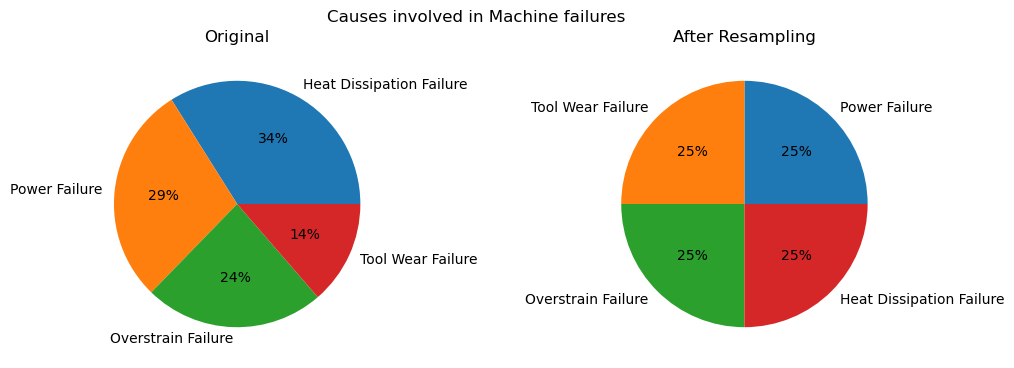

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Portion of df_res where there is a failure and causes percentage
df_res_fail = df_res[df_res['Failure Type'] != 'No Failure']
fail_res_percentage = 100 * df_res_fail['Failure Type'].value_counts() / df_res_fail.shape[0]

# Original failure percentage before SMOTE
df_fail = df2[df2['Failure Type'] != 'No Failure']
df_fail_percentage = 100 * df_fail['Failure Type'].value_counts() / df_fail.shape[0]

# Percentage increase in dataset size
print('Percentage increment of observations after oversampling:',
      round((df_res.shape[0] - df2.shape[0]) * 100 / df2.shape[0], 2))
print('SMOTE Resampled Failures percentage:',
      round(df_res_fail.shape[0] * 100 / df_res.shape[0], 2))

# Pie plot comparison
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
fig.suptitle('Causes involved in Machine failures')

# Original Data Pie Chart
axs[0].pie(df_fail_percentage, labels=df_fail_percentage.index,
           colors=sns.color_palette('tab10')[:5], autopct='%.0f%%')
axs[0].set_title('Original')

# SMOTE Resampled Data Pie Chart
axs[1].pie(fail_res_percentage, labels=fail_res_percentage.index,
           colors=sns.color_palette('tab10')[:5], autopct='%.0f%%')
axs[1].set_title('After Resampling')

plt.show()

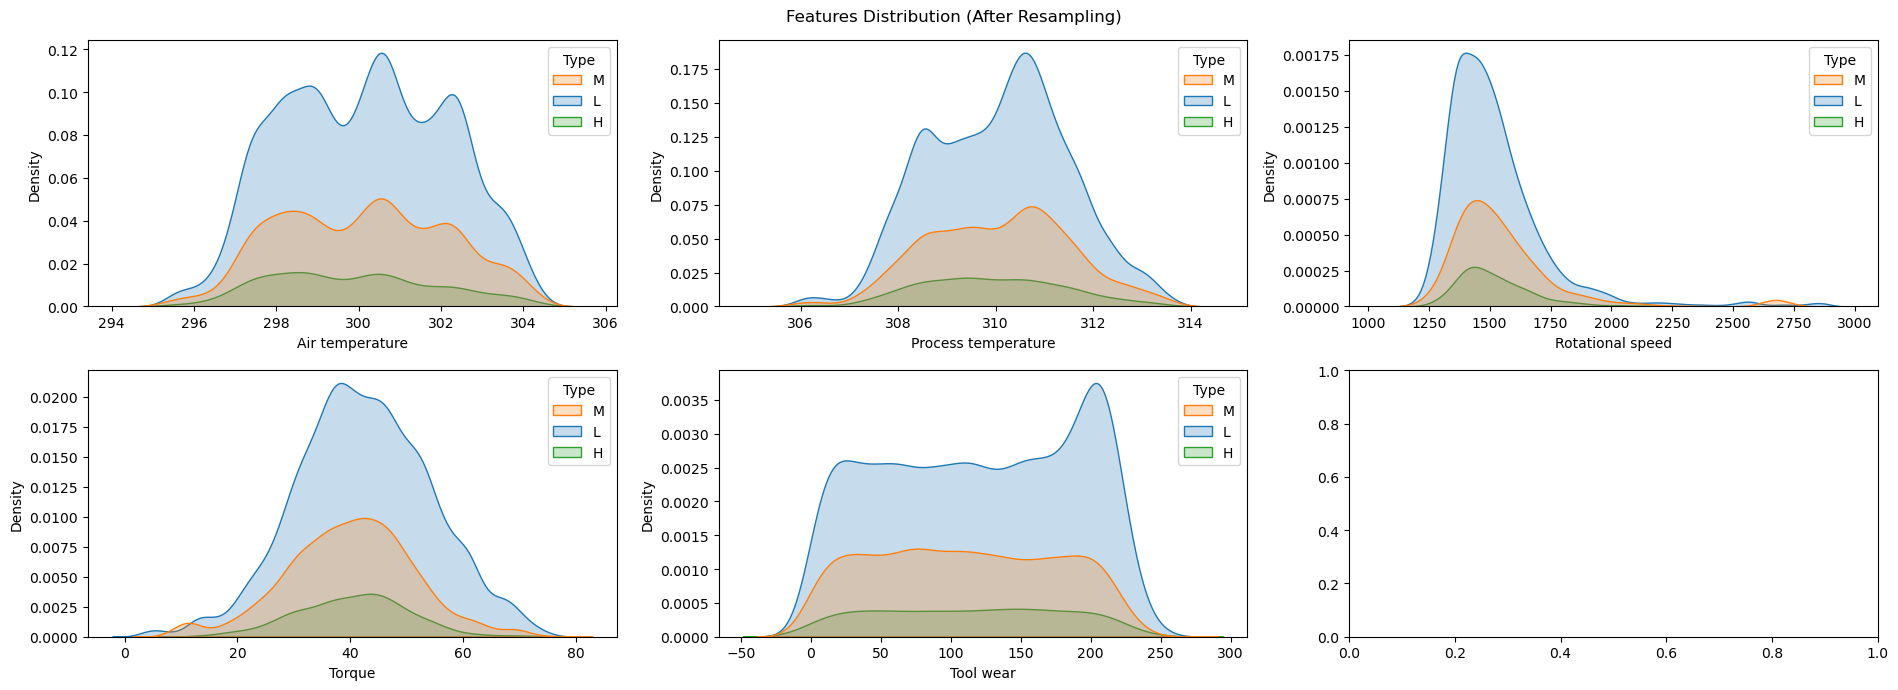

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# KDE plot of numeric features after resampling
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(19, 7))
fig.suptitle('Features Distribution (After Resampling)')

# Custom color palette for Type categories
custom_palette = {'L': 'tab:blue', 'M': 'tab:orange', 'H': 'tab:green'}

# Loop through numeric features
for j, feature in enumerate(num_features):
    sns.kdeplot(ax=axs[j // 3, j % 3], data=df_res, x=feature,
                hue=df_res['Type'], fill=True, palette=custom_palette)

plt.tight_layout()
plt.show()

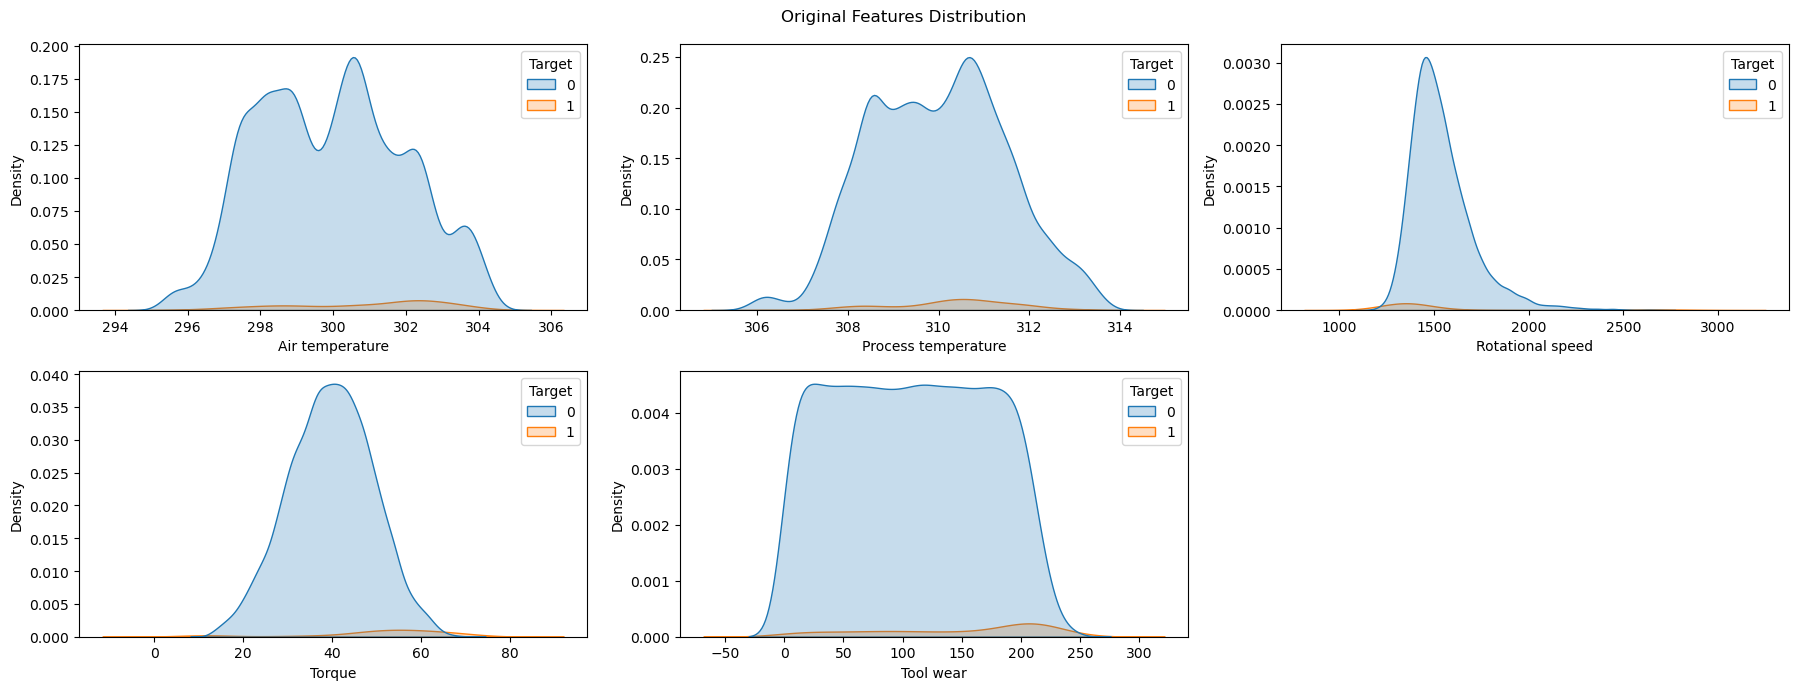

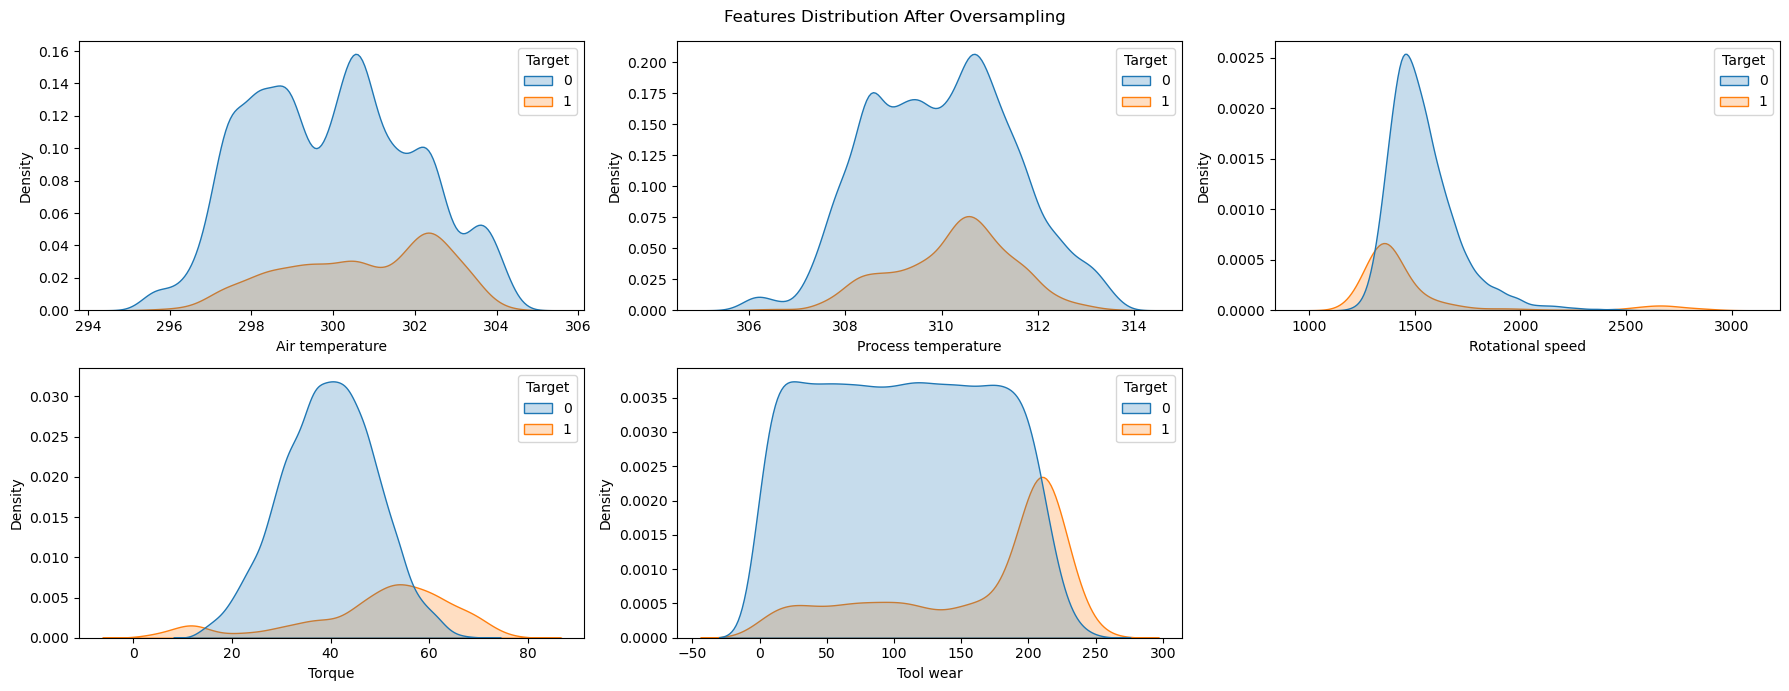

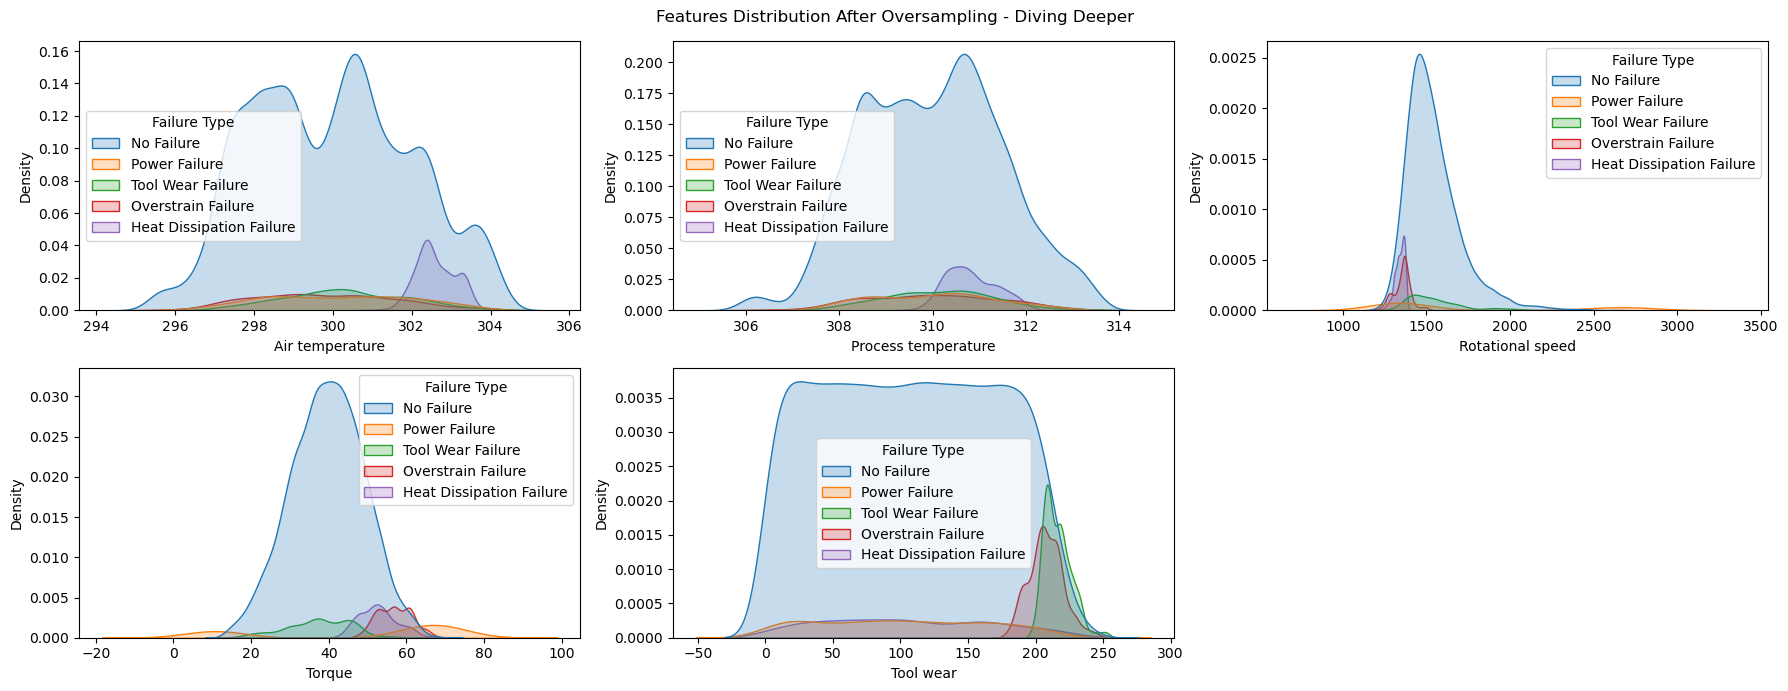

In [61]:
# KDE plot of numeric features (Original) - Hue: Target
fig, axs = plt.subplots(2, 3, figsize=(18, 7))
fig.suptitle('Original Features Distribution')

axs = axs.flatten()
for i, col in enumerate(num_features):
    sns.kdeplot(data=df1, x=col, hue='Target', fill=True, ax=axs[i], palette='tab10')

# Remove empty subplots if features < 6
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

# KDE plot of numeric features (After Resampling) - Hue: Target
fig, axs = plt.subplots(2, 3, figsize=(18, 7))
fig.suptitle('Features Distribution After Oversampling')

axs = axs.flatten()
for i, col in enumerate(num_features):
    sns.kdeplot(data=df_res, x=col, hue='Target', fill=True, ax=axs[i], palette='tab10')

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

# KDE plot of numeric features (After Resampling) - Hue: Failure Type
fig, axs = plt.subplots(2, 3, figsize=(18, 7))
fig.suptitle('Features Distribution After Oversampling - Diving Deeper')

axs = axs.flatten()
for i, col in enumerate(num_features):
    sns.kdeplot(data=df_res, x=col, hue='Failure Type', fill=True, ax=axs[i], palette='tab10')

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

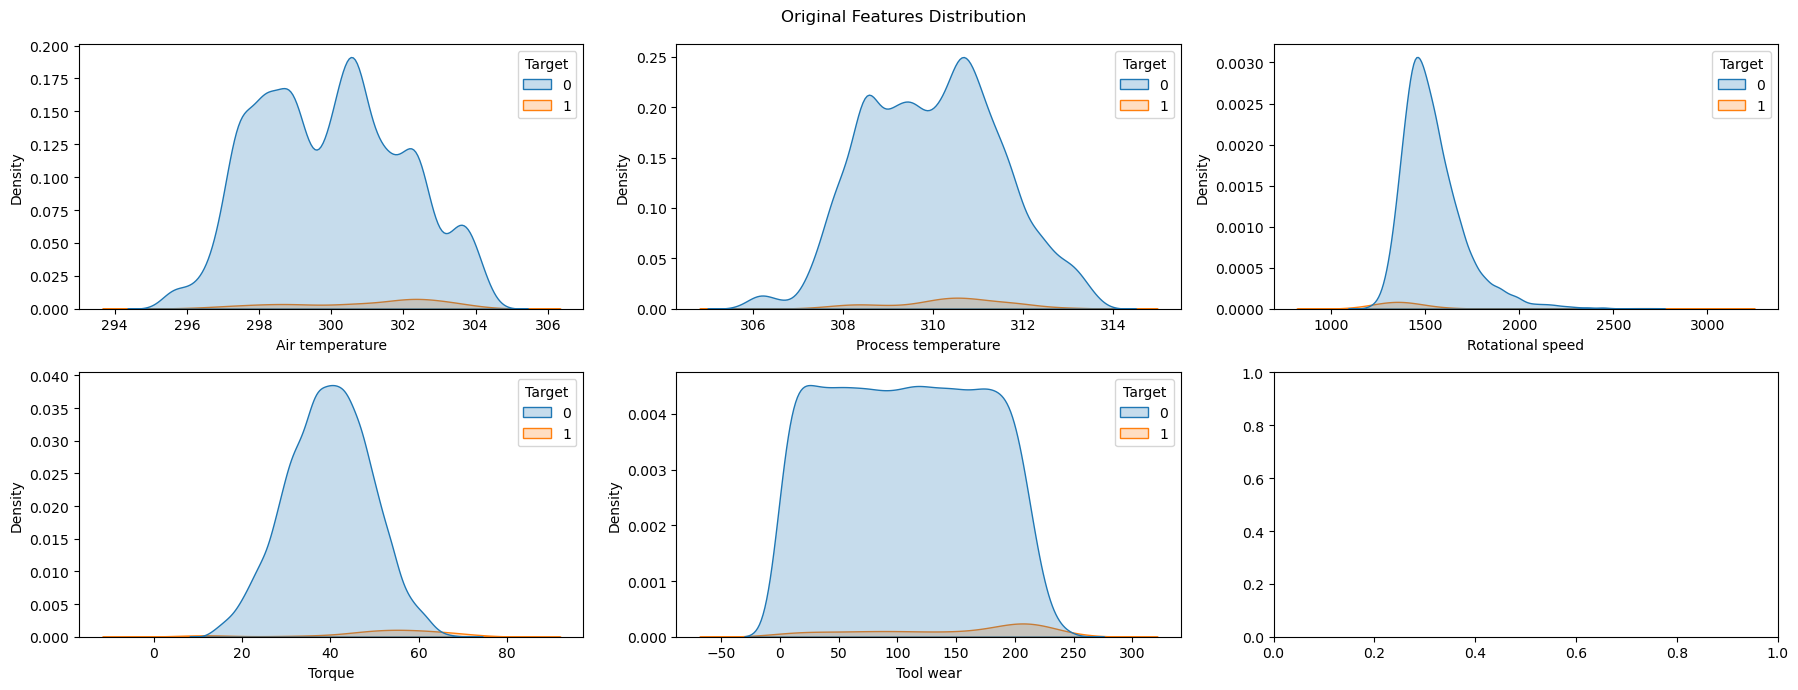

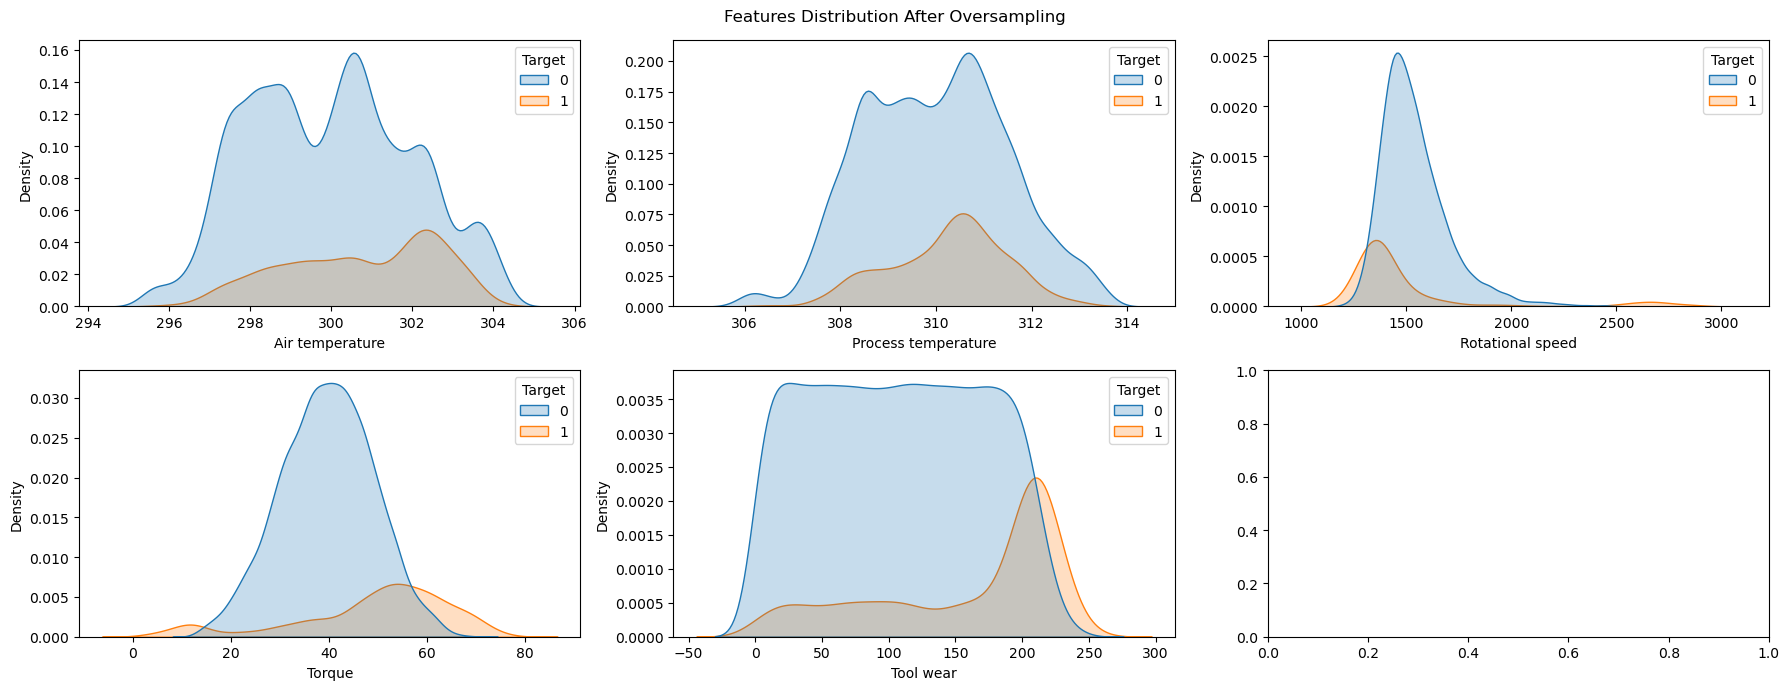

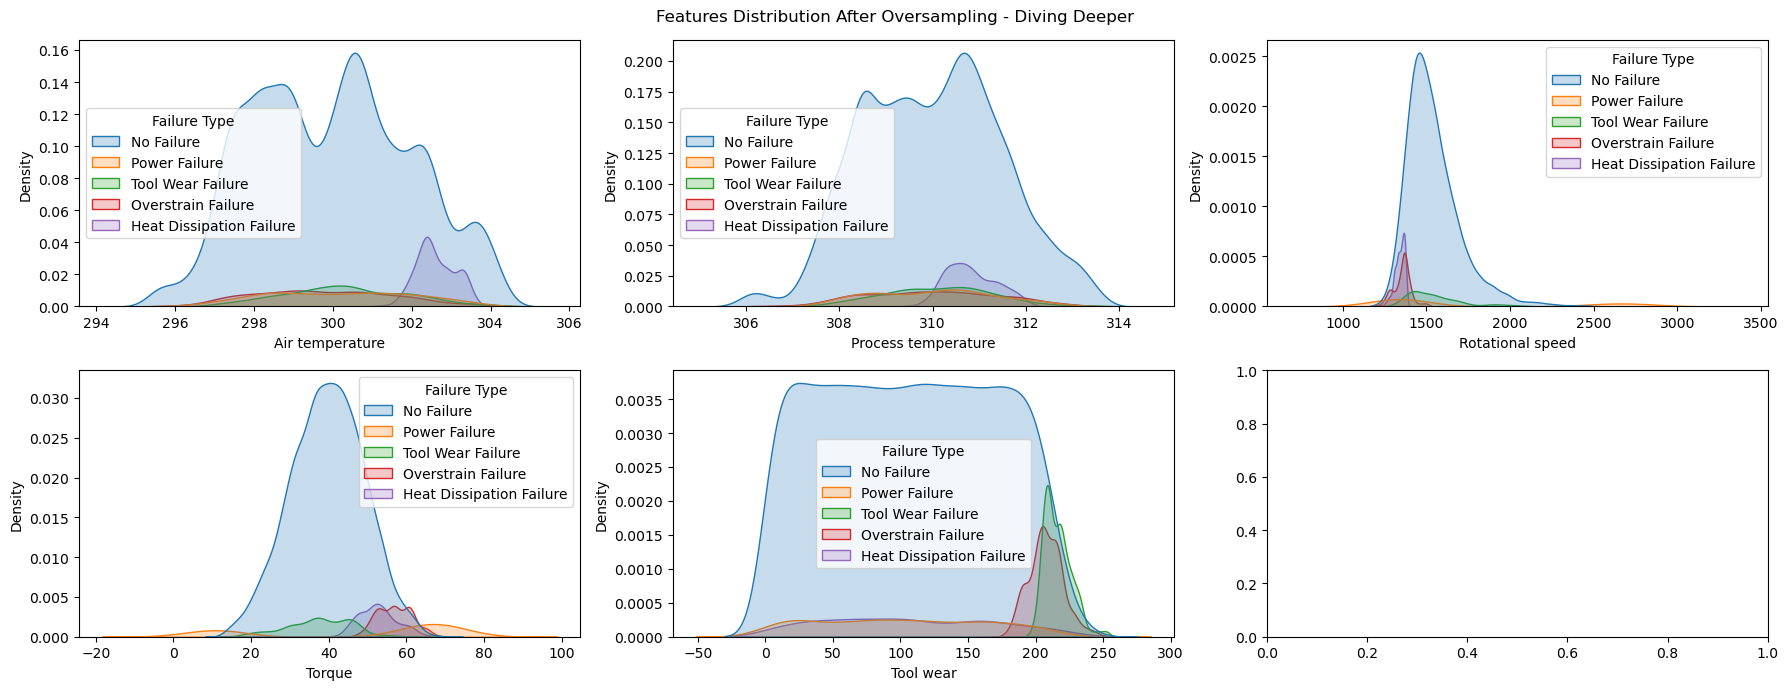

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# KDE plot of numeric features (Original)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 7))
fig.suptitle('Original Features Distribution')

for j, col in enumerate(num_features):
    sns.kdeplot(ax=axs[j // 3, j % 3], data=df1, x=col,
                hue=df1['Target'], fill=True, palette='tab10')

plt.tight_layout()
plt.show()

# KDE plot of numeric features (After Resampling)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 7))
fig.suptitle('Features Distribution After Oversampling')

for j, col in enumerate(num_features):
    sns.kdeplot(ax=axs[j // 3, j % 3], data=df_res, x=col,
                hue=df_res['Target'], fill=True, palette='tab10')

plt.tight_layout()
plt.show()

# KDE plot of numeric features (After Resampling) - Diving Deeper
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 7))
fig.suptitle('Features Distribution After Oversampling - Diving Deeper')

for j, col in enumerate(num_features):
    sns.kdeplot(ax=axs[j // 3, j % 3], data=df_res, x=col,
                hue=df_res['Failure Type'], fill=True, palette='tab10')

plt.tight_layout()
plt.show()

In [69]:
df_ml1 = df_res.copy()

In [71]:
# Encode categorical variables
df_ml1['Type'].replace({'L': 0, 'M': 1, 'H': 2}, inplace=True)
df_ml1['Failure Type'].replace({'No Failure': 0, 'Power Failure': 1, 'Overstrain Failure': 2, 'Heat Dissipation Failure': 3, 'Tool Wear Failure': 4}, inplace=True)

/var/folders/7m/27jbt3310cl5xwlb7_5g9rbm0000gn/T/ipykernel_2309/3936953258.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_ml1['Type'].replace({'L': 0, 'M': 1, 'H': 2}, inplace=True)
/var/folders/7m/27jbt3310cl5xwlb7_5g9rbm0000gn/T/ipykernel_2309/3936953258.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downca

In [73]:
from sklearn.preprocessing import StandardScaler

# Identify numeric features with dtype float64
num_features = [feature for feature in df_ml1.columns if df_ml1[feature].dtype == 'float64']

# Scale numeric features
df_ml1[num_features] = StandardScaler().fit_transform(df_ml1[num_features])

## ML Models - 1 | Target Failure or Not Failure

#### Defining Features (X) and Target (y)

In [77]:
X = df_ml1[['Process temperature', 'Rotational speed', 'Tool wear']]
y = df_ml1['Target']

#### Train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [82]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
def evaluate_model(model, model_name, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    results = {
        'Model': model_name,
        'Train Accuracy': accuracy_score(y_train, y_train_pred),
        'Test Accuracy': accuracy_score(y_test, y_test_pred),
        'F1 Score': f1_score(y_test, y_test_pred),
        'Precision': precision_score(y_test, y_test_pred),
        'Recall': recall_score(y_test, y_test_pred)
    }

    return results

#### **Train Logistic Regression with GridSearchCV**

In [85]:
param_grid_lr = {'C': [0.1, 1, 10], 'solver': ['liblinear']}
grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train, y_train)

best_lr = grid_lr.best_estimator_
lr_results = evaluate_model(best_lr, 'Logistic Regression', X_train, X_test, y_train, y_test)


#### **Train KNN with GridSearchCV**

In [88]:
param_grid_knn = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)

best_knn = grid_knn.best_estimator_
knn_results = evaluate_model(best_knn, 'KNN', X_train, X_test, y_train, y_test)

#### **Train SVC with GridSearchCV**

In [91]:
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train)

best_svm = grid_svm.best_estimator_
svm_results = evaluate_model(best_svm, 'SVM', X_train, X_test, y_train, y_test)

#### **Train Naïve Bayes**

In [94]:
nb = GaussianNB()
nb_results = evaluate_model(nb, 'Naïve Bayes', X_train, X_test, y_train, y_test)

#### **XGBClassifier**

In [97]:
# Method 1: Using ! prefix to run conda command in Jupyter
!conda install xgboost -y  # -y flag automatically answers yes to prompts

# Alternative Method 2: Using pip if conda doesn't work
# !pip install xgboost

Channels:
 - defaults
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.



In [99]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

param_grid_xgb = {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [50, 100, 200]}
grid_xgb = GridSearchCV(XGBClassifier(eval_metric='mlogloss'), param_grid_xgb, cv=5, scoring='accuracy')
grid_xgb.fit(X_train, y_train)

best_xgb = grid_xgb.best_estimator_
xgb_results = evaluate_model(best_xgb, 'XGBoost', X_train, X_test, y_train, y_test)


In [101]:
# Collect all results in a DataFrame
results_df = pd.DataFrame([lr_results, knn_results, svm_results, nb_results, xgb_results])

# Display results
print(results_df)

                 Model  Train Accuracy  Test Accuracy  F1 Score  Precision  \
0  Logistic Regression        0.805424       0.806354  0.076416   0.828571   
1                  KNN        1.000000       0.921547  0.812912   0.777078   
2                  SVM        0.898863       0.891713  0.724332   0.737822   
3          Naïve Bayes        0.801161       0.807182  0.231278   0.570652   
4              XGBoost        0.987565       0.937293  0.842907   0.844660   

     Recall  
0  0.040055  
1  0.852210  
2  0.711326  
3  0.145028  
4  0.841160  


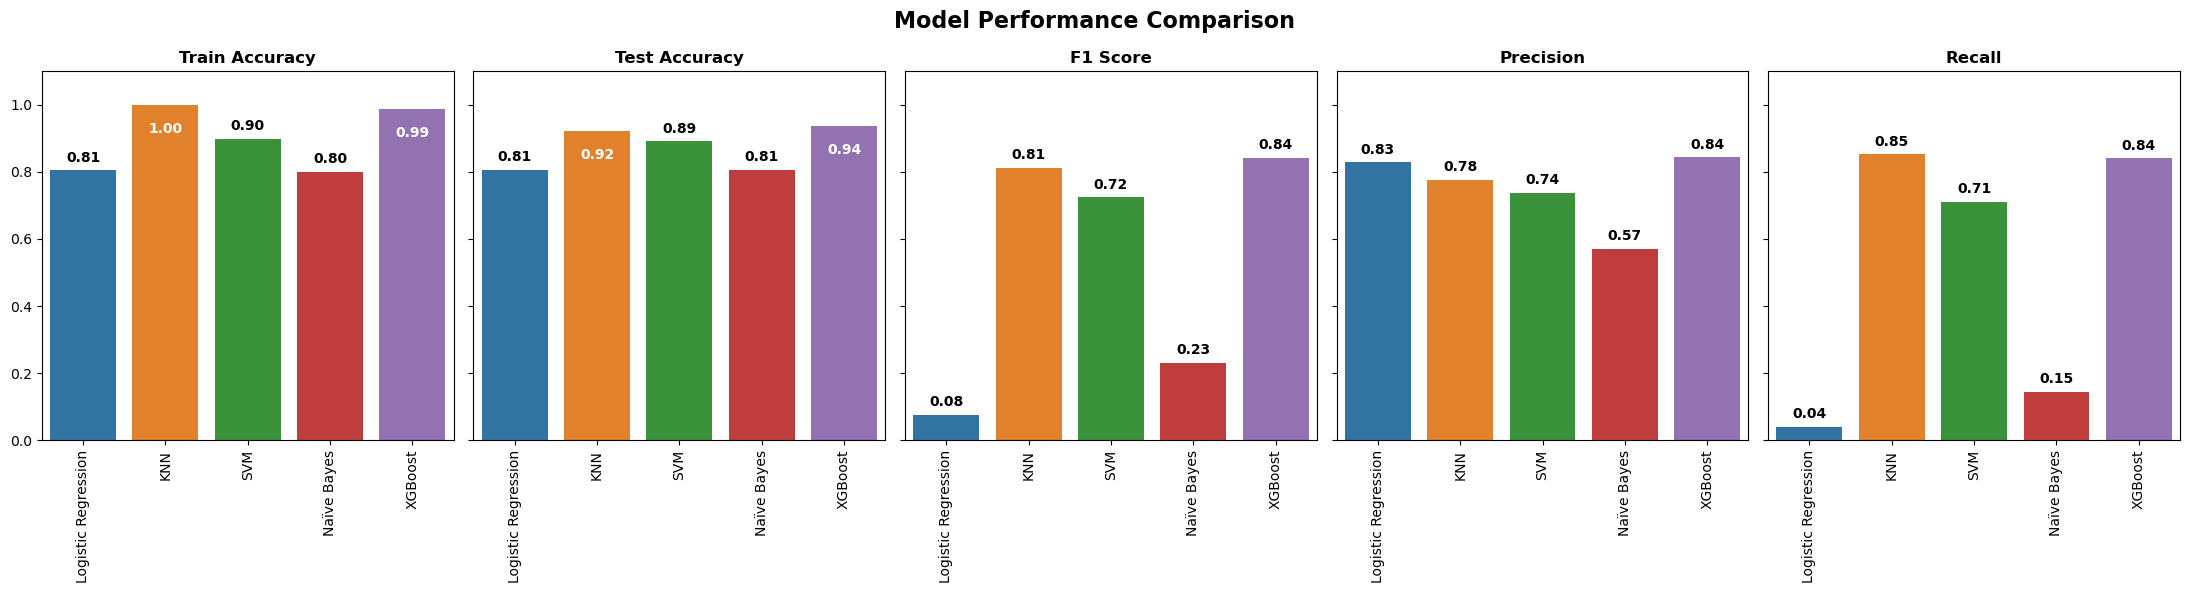

In [103]:
# Collect all results in a DataFrame
results_df = pd.DataFrame([lr_results, knn_results, svm_results, nb_results, xgb_results])

# Define metrics to visualize
metrics = ['Train Accuracy', 'Test Accuracy', 'F1 Score', 'Precision', 'Recall']

# Set figure size
fig, axes = plt.subplots(1, len(metrics), figsize=(22, 6), sharey=True)
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

# Create bar plots for each metric
for i, metric in enumerate(metrics):
    ax = axes[i]

    # Use 'hue' to fix the seaborn warning
    bars = sns.barplot(x='Model', y=metric, hue='Model', data=results_df, ax=ax)

    # Set proper x-ticks to avoid warning
    ax.set_xticks(range(len(results_df['Model'])))
    ax.set_xticklabels(results_df['Model'], rotation=90, ha="center")

    # Annotate bars dynamically
    for bar in bars.patches:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 6 if height < 0.9 else -20),
                    textcoords="offset points",
                    ha='center', fontsize=10, fontweight='bold',
                    color='black' if height < 0.9 else 'white')  # Change text color dynamically

    ax.set_title(metric, fontsize=12, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_ylim(0, 1.1)  # Slightly increase y-limit to avoid text cutoff

plt.tight_layout()
plt.show()

In [105]:
import joblib

# Save the best XGBoost model
joblib.dump(best_xgb, 'best_xgb_model.pkl')
print("Best XGBoost model saved as 'best_xgb_model.pkl'")

Best XGBoost model saved as 'best_xgb_model.pkl'


## ML Model - 2 | Failure Type

In [110]:
# Select rows where 'Target' is 1
df_failure = df_ml1[df_ml1['Target'] == 1].copy()

# Define features and target
X_failure = df_failure[['Process temperature', 'Rotational speed', 'Tool wear']]
y_failure = df_failure['Failure Type']

#### Train_test_split

In [113]:
from sklearn.model_selection import train_test_split

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(
    X_failure, y_failure, test_size=0.3, random_state=42, stratify=y_failure)

In [115]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def evaluate_model(model, model_name, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    return {
        'Model': model_name,
        'Train Accuracy': accuracy_score(y_train, y_train_pred),
        'Test Accuracy': accuracy_score(y_test, y_test_pred),
        'F1 Score': f1_score(y_test, y_test_pred, average='weighted'),
        'Precision': precision_score(y_test, y_test_pred, average='weighted'),
        'Recall': recall_score(y_test, y_test_pred, average='weighted')
    }

#### Logistic Regression

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid_lr = {'C': [0.1, 1, 10], 'solver': ['lbfgs']}
grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train_f, y_train_f)

best_lr = grid_lr.best_estimator_
lr_results = evaluate_model(best_lr, 'Logistic Regression', X_train_f, X_test_f, y_train_f, y_test_f)


#### KNN

In [122]:
from sklearn.neighbors import KNeighborsClassifier

param_grid_knn = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train_f, y_train_f)

best_knn = grid_knn.best_estimator_
knn_results = evaluate_model(best_knn, 'KNN', X_train_f, X_test_f, y_train_f, y_test_f)

#### SVC

In [125]:
from sklearn.svm import SVC

param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train_f, y_train_f)

best_svm = grid_svm.best_estimator_
svm_results = evaluate_model(best_svm, 'SVM', X_train_f, X_test_f, y_train_f, y_test_f)

#### Naive Bayes

In [130]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_f, y_train_f)

nb_results = evaluate_model(nb, 'Naïve Bayes', X_train_f, X_test_f, y_train_f, y_test_f)

#### xgboost

In [133]:
from xgboost import XGBClassifier

param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

# Adjust class labels to start from 0 if necessary
y_train_f_adj = y_train_f - y_train_f.min()
y_test_f_adj = y_test_f - y_test_f.min()

# Define XGBClassifier without `use_label_encoder`
grid_xgb = GridSearchCV(
    XGBClassifier(objective='multi:softmax', num_class=len(set(y_train_f_adj)), eval_metric='mlogloss'),
    param_grid_xgb, cv=5, scoring='accuracy'
)

grid_xgb.fit(X_train_f, y_train_f_adj)

best_xgb = grid_xgb.best_estimator_
xgb_results = evaluate_model(best_xgb, 'XGBoost', X_train_f, X_test_f, y_train_f_adj, y_test_f_adj)


In [135]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from typing import Dict, Any

def create_xgboost_param_grid() -> Dict[str, list]:
    """
    Creates parameter grid for XGBoost hyperparameter tuning.
    
    Returns:
        Dict[str, list]: Dictionary containing parameter names and their possible values.
    """
    return {
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [50, 100, 200]
    }

def adjust_labels(y_train: np.ndarray, y_test: np.ndarray) -> tuple:
    """
    Adjusts class labels to start from 0.
    
    Args:
        y_train: Training labels
        y_test: Testing labels
        
    Returns:
        tuple: Adjusted training and testing labels
    """
    min_label = y_train.min()
    return y_train - min_label, y_test - min_label

def train_xgboost_model(X_train: np.ndarray, y_train: np.ndarray, 
                       param_grid: Dict[str, list], n_classes: int) -> Any:
    """
    Trains XGBoost model using GridSearchCV for hyperparameter tuning.
    
    Args:
        X_train: Training features
        y_train: Training labels
        param_grid: Parameter grid for GridSearchCV
        n_classes: Number of unique classes
        
    Returns:
        Any: Best fitted XGBoost model
    """
    model = XGBClassifier(
        objective='multi:softmax',
        num_class=n_classes,
        eval_metric='mlogloss'
    )
    
    grid_search = GridSearchCV(
        model,
        param_grid,
        cv=5,
        scoring='accuracy'
    )
    
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

# Main execution
param_grid_xgb = create_xgboost_param_grid()
y_train_f_adj, y_test_f_adj = adjust_labels(y_train_f, y_test_f)

best_xgb = train_xgboost_model(
    X_train_f, 
    y_train_f_adj, 
    param_grid_xgb, 
    len(set(y_train_f_adj))
)

xgb_results = evaluate_model(
    best_xgb, 
    'XGBoost', 
    X_train_f, 
    X_test_f, 
    y_train_f_adj, 
    y_test_f_adj
)


Justification for changes:
1. Split the code into smaller, focused functions with clear responsibilities
2. Added type hints for better code understanding and IDE support
3. Added docstrings to explain function purposes and parameters
4. Created separate functions for:
   - Parameter grid creation
   - Label adjustment
   - Model training and hyperparameter tuning
5. Made the code more modular and easier to maintain
6. Improved readability by using meaningful variable names and consistent formatting
7. Added explicit imports for required dependencies

The refactored code is more organized, easier to test, and follows Python best practices while maintaining the original functionality.

In [138]:
import pandas as pd

# Collect all results in a DataFrame
results_df = pd.DataFrame([
    lr_results,
    knn_results,
    svm_results,
    nb_results,
    xgb_results
])

# Display results
print(results_df)

                 Model  Train Accuracy  Test Accuracy  F1 Score  Precision  \
0  Logistic Regression        0.771327       0.763812  0.764510   0.795943   
1                  KNN        1.000000       0.888122  0.888666   0.891419   
2                  SVM        0.815166       0.795580  0.797654   0.829865   
3          Naïve Bayes        0.774882       0.761050  0.759673   0.798306   
4              XGBoost        1.000000       0.903315  0.903529   0.904391   

     Recall  
0  0.763812  
1  0.888122  
2  0.795580  
3  0.761050  
4  0.903315  


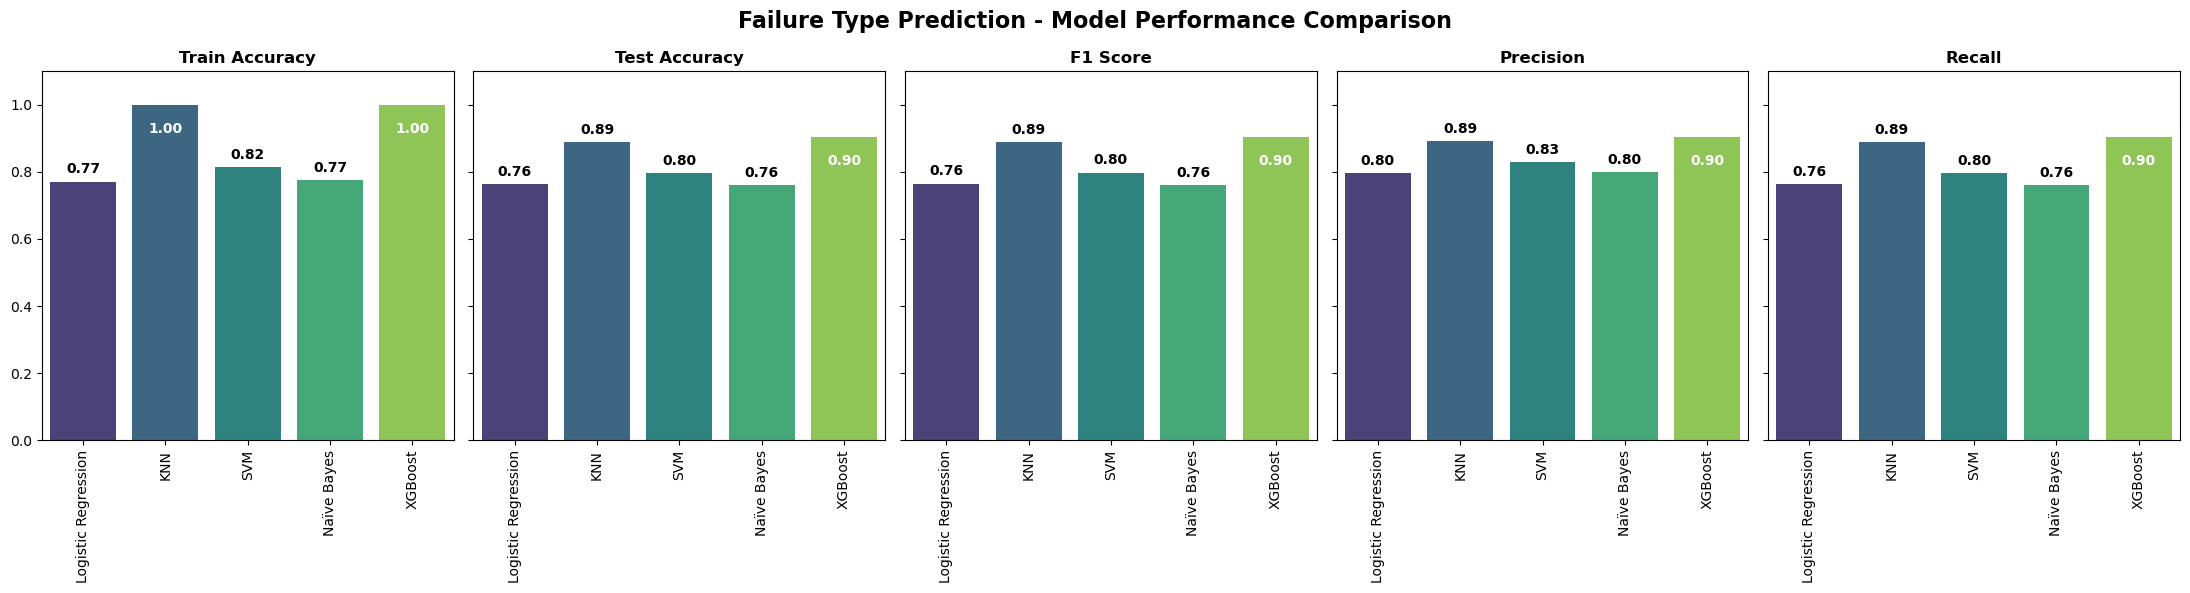

In [140]:
# Collect results
results_df_f = pd.DataFrame([lr_results, knn_results, svm_results, nb_results, xgb_results])

# Define metrics to visualize
metrics = ['Train Accuracy', 'Test Accuracy', 'F1 Score', 'Precision', 'Recall']

# Set figure size
fig, axes = plt.subplots(1, len(metrics), figsize=(22, 6), sharey=True)
fig.suptitle('Failure Type Prediction - Model Performance Comparison', fontsize=16, fontweight='bold')

# Create bar plots for each metric
for i, metric in enumerate(metrics):
    ax = axes[i]
    bars = sns.barplot(x='Model', y=metric, hue='Model', data=results_df_f, ax=ax, palette='viridis')

    ax.set_xticks(range(len(results_df_f['Model'])))
    ax.set_xticklabels(results_df_f['Model'], rotation=90, ha="center")

    for bar in bars.patches:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 6 if height < 0.9 else -20),
                    textcoords="offset points",
                    ha='center', fontsize=10, fontweight='bold',
                    color='black' if height < 0.9 else 'white')

    ax.set_title(metric, fontsize=12, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_ylim(0, 1.1)  # Slightly increase y-limit to avoid text cutoff

plt.tight_layout()
plt.show()

In [142]:
# Save the best XGBoost model
joblib.dump(best_xgb, 'best_xgb_model2.pkl')
print("Model saved as best_xgb_model2.pkl")

Model saved as best_xgb_model2.pkl


# **Model Deployment**

In [147]:
!pip install pyngrok
!ngrok authtoken 2tuU1MF7s5T7cAyFNWMyVRNEhFT_4FJByH9mu2e38GpQMwRZc

Authtoken saved to configuration file: /Users/aadarshk/Library/Application Support/ngrok/ngrok.yml


# Industrial Equipment Predictive Maintenance Dataset

This dataset contains sensor readings from industrial machines and their corresponding failure types. Each row represents a machine's operational parameters at a given time, along with its failure classification.

| Type | Air Temperature [K] | Process Temperature [K] | Rotational Speed [rpm] | Torque [Nm] | Tool Wear [min] | Failure (1=Yes, 0=No) | Failure Type |
|------|---------------------|-------------------------|------------------------|-------------|----------------|------------------------|--------------|
| L    | 298.9               | 309.1                   | 2861                   | 4.6         | 143            | 1                      | Power Failure |
| L    | 298.9               | 309.0                   | 1410                   | 65.7        | 191            | 1                      | Power Failure |
| L    | 298.8               | 308.9                   | 1455                   | 41.3        | 208            | 1                      | Tool Wear Failure |
| L    | 298.4               | 308.2                   | 1282                   | 60.7        | 216            | 1                      | Overstrain Failure |
| L    | 298.3               | 308.1                   | 1412                   | 52.3        | 218            | 1                      | Overstrain Failure |
| L    | 298.4               | 308.3                   | 1433                   | 62.3        | 20             | 1                      | Power Failure |
| M    | 298.2               | 308.5                   | 2678                   | 10.7        | 86             | 1                      | Power Failure |
| M    | 298.4               | 308.7                   | 1421                   | 60.7        | 119            | 1                      | Power Failure |
| L    | 298.0               | 308.2                   | 1348                   | 58.8        | 202            | 1                      | Overstrain Failure |
| L    | 298.0               | 308.3                   | 1362                   | 56.8        | 216            | 1                      | Overstrain Failure |
| L    | 298.0               | 308.3                   | 1405                   | 56.2        | 218            | 1                      | Overstrain Failure |
| M    | 298.1               | 308.2                   | 1420                   | 63.9        | 19             | 1                      | Power Failure |
| L    | 297.7               | 308.5                   | 1373                   | 56.7        | 203            | 1                      | Overstrain Failure |
| L    | 297.5               | 308.3                   | 2564                   | 12.8        | 127            | 1                      | Power Failure |
| L    | 297.4               | 308.5                   | 1399                   | 61.5        | 61             | 1                      | Power Failure |
| L    | 297.4               | 308.7                   | 2874                   | 4.2         | 118            | 1                      | Power Failure |
| L    | 297.6               | 309.6                   | 1501                   | 49.8        | 222            | 1                      | Overstrain Failure |
| L    | 297.9               | 309.8                   | 1336                   | 71.6        | 31             | 1                      | Power Failure |
| L    | 296.8               | 308.1                   | 1289                   | 62.0        | 199            | 1                      | Overstrain Failure |
| L    | 296.4               | 307.4                   | 2833                   | 5.6         | 213            | 1                      | Power Failure |
| M    | 295.8               | 306.3                   | 1235                   | 76.2        | 89             | 1                      | Power Failure |
| L    | 295.7               | 306.2                   | 2270                   | 14.6        | 149            | 1                      | Power Failure |
| L    | 295.6               | 306.1                   | 1372                   | 55.6        | 215            | 1                      | Overstrain Failure |
| M    | 296.3               | 307.2                   | 1319                   | 68.3        | 24             | 1                      | Power Failure |
| L    | 297.0               | 307.8                   | 1385                   | 56.4        | 202            | 1                      | Overstrain Failure |
| H    | 296.9               | 307.8                   | 1549                   | 35.8        | 206            | 1                      | Tool Wear Failure |
| L    | 296.9               | 307.5                   | 2721                   | 9.3         | 18             | 1                      | Power Failure |
| H    | 296.6               | 307.7                   | 1386                   | 62.3        | 100            | 1                      | Power Failure |
| M    | 296.7               | 307.8                   | 1258                   | 69.0        | 105            | 1                      | Power Failure |

---

> **Note:**  
> - `Failure` column: **1** = Machine Failure, **0** = No Failure.  
> - `Failure Type`: The reason for failure (e.g., **Power Failure, Overstrain Failure, Tool Wear Failure**).  
> - The dataset captures operational parameters like **temperature, rotational speed, torque, and tool wear** to predict failures.  

---

## **How to Use This Data?**
1. Train a **predictive maintenance model** to classify failure vs. no failure.
2


In [154]:
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report

# Load trained models
model_target = joblib.load("best_xgb_model.pkl")  # Model for Failure/No Failure
model_failure_type = joblib.load("best_xgb_model2.pkl")  # Model for Failure Type

# Failure Type Mapping (as used during training)
failure_type_mapping = {
    0: "No Failure",
    1: "Power Failure",
    2: "Overstrain Failure",
    3: "Heat Dissipation Failure",
    4: "Tool Wear Failure"
}

# Reverse mapping (for comparison with actual values)
failure_type_reverse_mapping = {v: k for k, v in failure_type_mapping.items()}

# ✅ **Load Your Data**
data = [
    ["L", 298.9, 309.1, 2861, 4.6, 143, 1, "Power Failure"],
    ["L", 298.9, 309.0, 1410, 65.7, 191, 1, "Power Failure"],
    ["L", 298.8, 308.9, 1455, 41.3, 208, 1, "Tool Wear Failure"],
    ["L", 298.4, 308.2, 1282, 60.7, 216, 1, "Overstrain Failure"],
    ["L", 298.3, 308.1, 1412, 52.3, 218, 1, "Overstrain Failure"],
    ["L", 298.4, 308.3, 1433, 62.3, 20, 1, "Power Failure"],
    ["M", 298.2, 308.5, 2678, 10.7, 86, 1, "Power Failure"],
    ["M", 298.4, 308.7, 1421, 60.7, 119, 1, "Power Failure"],
    ["L", 298.0, 308.2, 1348, 58.8, 202, 1, "Overstrain Failure"],
    ["L", 298.0, 308.3, 1362, 56.8, 216, 1, "Overstrain Failure"],
]

# Convert to DataFrame
columns = ["Type", "Air temperature", "Process temperature", "Rotational speed", "Torque", "Tool wear", "Actual Failure", "Actual Failure Type"]
df = pd.DataFrame(data, columns=columns)
df

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Actual Failure,Actual Failure Type
0,L,298.9,309.1,2861,4.6,143,1,Power Failure
1,L,298.9,309.0,1410,65.7,191,1,Power Failure
2,L,298.8,308.9,1455,41.3,208,1,Tool Wear Failure
3,L,298.4,308.2,1282,60.7,216,1,Overstrain Failure
4,L,298.3,308.1,1412,52.3,218,1,Overstrain Failure
5,L,298.4,308.3,1433,62.3,20,1,Power Failure
6,M,298.2,308.5,2678,10.7,86,1,Power Failure
7,M,298.4,308.7,1421,60.7,119,1,Power Failure
8,L,298.0,308.2,1348,58.8,202,1,Overstrain Failure
9,L,298.0,308.3,1362,56.8,216,1,Overstrain Failure


In [156]:
# ✅ **Preprocess Data for Model**
# Encode Machine Type (L=0, M=1, H=2)
df["Type"] = df["Type"].map({"L": 0, "M": 1, "H": 2})

# **Step 1: Predict Failure or No Failure**
df["Predicted Failure"] = model_target.predict(df.drop(columns=["Type", "Actual Failure", "Actual Failure Type", "Air temperature", "Torque"]))
df

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Actual Failure,Actual Failure Type,Predicted Failure
0,0,298.9,309.1,2861,4.6,143,1,Power Failure,0
1,0,298.9,309.0,1410,65.7,191,1,Power Failure,0
2,0,298.8,308.9,1455,41.3,208,1,Tool Wear Failure,0
3,0,298.4,308.2,1282,60.7,216,1,Overstrain Failure,0
4,0,298.3,308.1,1412,52.3,218,1,Overstrain Failure,0
5,0,298.4,308.3,1433,62.3,20,1,Power Failure,0
6,1,298.2,308.5,2678,10.7,86,1,Power Failure,0
7,1,298.4,308.7,1421,60.7,119,1,Power Failure,0
8,0,298.0,308.2,1348,58.8,202,1,Overstrain Failure,0
9,0,298.0,308.3,1362,56.8,216,1,Overstrain Failure,0


In [158]:

# **Step 2: Predict Failure Type if Failure is Detected**
df["Predicted Failure Type"] = "No Failure"
failure_rows = df["Predicted Failure"] == 1  # Select rows where failure is predicted

# Select features required for failure type prediction
failure_features = df[failure_rows].rename(columns={
    "Process temperature [K]": "Process temperature",
    "Rotational speed [rpm]": "Rotational speed",
    "Tool wear [min]": "Tool wear"
})[["Process temperature", "Rotational speed", "Tool wear"]]

# Predict failure type for failed cases
if not failure_features.empty:
    failure_predictions = model_failure_type.predict(failure_features)
    df.loc[failure_rows, "Predicted Failure Type"] = failure_predictions
    df["Predicted Failure Type"] = df["Predicted Failure Type"].replace(failure_type_mapping)

# ✅ **Compare Predictions with Actual Labels**
df["Actual Failure Type"] = df["Actual Failure Type"].replace(failure_type_reverse_mapping)  # Convert actual failure type to numbers for comparison
df["Predicted Failure Type"] = df["Predicted Failure Type"].replace(failure_type_reverse_mapping)  # Convert predictions to numbers for comparison

# **Evaluate Model Performance**
failure_accuracy = accuracy_score(df["Actual Failure"], df["Predicted Failure"])
failure_type_accuracy = accuracy_score(df[df["Actual Failure"] == 1]["Actual Failure Type"], df[df["Actual Failure"] == 1]["Predicted Failure Type"])

print("\n✅ **Failure Detection Accuracy:**", round(failure_accuracy * 100, 2), "%")
print("✅ **Failure Type Classification Accuracy:**", round(failure_type_accuracy * 100, 2), "%\n")

print("\n📊 **Classification Report for Failure Detection:**\n", classification_report(df["Actual Failure"], df["Predicted Failure"]))
print("\n📊 **Classification Report for Failure Type Prediction:**\n", classification_report(df[df["Actual Failure"] == 1]["Actual Failure Type"], df[df["Actual Failure"] == 1]["Predicted Failure Type"]))


✅ **Failure Detection Accuracy:** 0.0 %
✅ **Failure Type Classification Accuracy:** 0.0 %


📊 **Classification Report for Failure Detection:**
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00      10.0

    accuracy                           0.00      10.0
   macro avg       0.00      0.00      0.00      10.0
weighted avg       0.00      0.00      0.00      10.0


📊 **Classification Report for Failure Type Prediction:**
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       5.0
           2       0.00      0.00      0.00       4.0
           4       0.00      0.00      0.00       1.0

    accuracy                           0.00      10.0
   macro avg       0.00      0.00      0.00      10.0
weighted avg       0.00      0.00      0.00      10.0



/var/folders/7m/27jbt3310cl5xwlb7_5g9rbm0000gn/T/ipykernel_2309/1004120754.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Actual Failure Type"] = df["Actual Failure Type"].replace(failure_type_reverse_mapping)  # Convert actual failure type to numbers for comparison
/var/folders/7m/27jbt3310cl5xwlb7_5g9rbm0000gn/T/ipykernel_2309/1004120754.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Predicted Failure Type"] = df["Predicted Failure Type"].replace(failure_type_reverse_mapping)  # Convert predictions to numbers